<a href="https://colab.research.google.com/github/resthiana12/Kelainan_Psikologis_CNN/blob/main/IMBDN_Depresi_1000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#Install Package yang Dibutuhkan**

In [1]:
pip install emot

     |████████████████████████████████| 61 kB 17 kB/s 


In [2]:
pip install emoji

     |████████████████████████████████| 184 kB 7.3 MB/s 
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186469 sha256=4c76ad2cee115d0a48587d9f2624e62a5884fec18c169a7927852f2a01f03806
  Stored in directory: /root/.cache/pip/wheels/e4/61/e7/2fc1ac8f306848fc66c6c013ab511f0a39ef4b1825b11363b2
Successfully built emoji


In [3]:
pip install sastrawi

     |████████████████████████████████| 209 kB 8.5 MB/s 


In [4]:
pip install swifter

     |████████████████████████████████| 296 kB 7.0 MB/s 
     |████████████████████████████████| 118 kB 56.7 MB/s 
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


**#Load Library**

In [5]:
#load library
import nltk                             
import matplotlib.pyplot as plt           
import random  
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
import numpy as np
import pandas as pd
import re                                  
import string                             
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer 
from nltk import pos_tag, word_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import words
import emoji
#from emot.emo_unicode import UNICODE_EMO, EMOTICONS
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
from wordcloud import WordCloud 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


**Preprocessing**

In [6]:
stop = pd.read_csv("drive/MyDrive/stopwords.txt", names= ["stopwords"], header = None)
stop['stopwords']
# Defining my NLTK stop words and my user-defined stop words
stop_words = list(stopwords.words('indonesian'))
# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
user_stopwords = ['yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'na',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 'ber',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 's','lhaa',
                       'qrt', 'd', 'ayyy', 'eptember', 'tu', 'kat', 'd',
                        'bdhshshhs', 'denngan','ba', 'ah', 'tuu', 'kaann', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt', 'je',
                       '&amp', 'yah', 'x', 'xf', 'xe', 'first', 'second',
                        'the', 'to', 'yaa', 'dirut', 'la', 'pon']
alphabets = list(string.ascii_lowercase)
stop_words_fix = stop_words + alphabets + stop['stopwords'].to_list()

# Function to remove punctuations, links, emojis, and stop words
def preprocessTweets(tweet):
    tweet = tweet.lower()  #has to be in place
    #Remove 'b
    tweet = re.sub(r"b'", '', tweet)
    # Remove urls dan trash
    tweet = re.sub(r"http\S+|\\x\S+|www\S+|https\S+|dot|com", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#|\d+', '', tweet)
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)  # convert string to tokens
    filtered_words = [w for w in tweet_tokens if w not in stop_words_fix]
    filtered_words = [w for w in tweet_tokens if w not in user_stopwords]

    # Remove punctuations
    unpunctuated_words = [char for char in filtered_words if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)

    return "".join(unpunctuated_words)  # join words with a space in between them

def tokenkan(text):    
  tokens = nltk.tokenize.word_tokenize(text)
  return tokens

normalizad_word = pd.read_excel("drive/MyDrive/normalisasi.xlsx")
normalizad_word_dict = {}
for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

def stopwords_removal(words):
    return [word for word in words if word not in stop_words]

def remove_punct(text):
  text_nopunct = ''
  text_nopunct = re.sub('['+string.punctuation+']', '', text)
  return text_nopunct

In [7]:
data = pd.read_csv('drive/MyDrive/data_noemoticon/Depresi_Non_1000_Preprocessed.csv')
data.drop(['Unnamed: 0', 'Postingan', 'Postingan_Tokenkan', 'Postingan_Normalized'], axis=1, inplace=True)
data.columns = ['Label', 'Text_Final']
data['Text_Final'] = data['Text_Final'].apply(remove_punct)
data.head()

,Label,Text_Final
0,1,paham signifikan cemas depresi sepi mudah band...
1,1,orang tua depresi sulit orangorang gen x erti ...
2,1,depresi bicara pedang mata suka balap orang ku...
3,1,tortilla isi depresi sembuh olivia depresi
4,1,butuh obat depresi hujan imbang alam jahat bth


In [8]:
data.Label.unique()

array([1, 0])

In [9]:
mengidap = []
non = []
for l in data.Label:
    if l == 0:
        mengidap.append(0)
        non.append(1)
    elif l == 1:
        mengidap.append(1)
        non.append(0)

In [10]:
data['non']= non
data['mengidap']= mengidap

In [11]:
data['tokens'] = data['Text_Final'].astype(str)
data['tokens'] = data['tokens'].apply(tokenkan)

In [12]:
data = data[['Text_Final', 'tokens', 'Label', 'non', 'mengidap']]

In [13]:
data.head()

,Text_Final,tokens,Label,non,mengidap
0,paham signifikan cemas depresi sepi mudah band...,"[paham, signifikan, cemas, depresi, sepi, muda...",1,0,1
1,orang tua depresi sulit orangorang gen x erti ...,"[orang, tua, depresi, sulit, orangorang, gen, ...",1,0,1
2,depresi bicara pedang mata suka balap orang ku...,"[depresi, bicara, pedang, mata, suka, balap, o...",1,0,1
3,tortilla isi depresi sembuh olivia depresi,"[tortilla, isi, depresi, sembuh, olivia, depresi]",1,0,1
4,butuh obat depresi hujan imbang alam jahat bth,"[butuh, obat, depresi, hujan, imbang, alam, ja...",1,0,1


**Import Library Untuk CNN**

In [14]:
from __future__ import division, print_function
from gensim import models
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from sklearn.model_selection import train_test_split
import os
import collections
import string
import tensorflow as tf
import keras

**Split data into test and train**

In [15]:
data_train, data_test = train_test_split(data, test_size=0.20, random_state=20)

In [16]:
all_training_words = [word for tokens in data_train["tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

5762 words total, with a vocabulary size of 2225
Max sentence length is 38


In [17]:
all_test_words = [word for tokens in data_test["tokens"] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test["tokens"]]
TEST_VOCAB = sorted(list(set(all_test_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_test_words), len(TEST_VOCAB)))
print("Max sentence length is %s" % max(test_sentence_lengths))

1472 words total, with a vocabulary size of 854
Max sentence length is 24


**Load Google News Word2Vec model**

In [18]:
word2vec_path = 'drive/MyDrive/GoogleNews-vectors-negative300.bin.gz'
word2vec = models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [19]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_comments, generate_missing=False):
    embeddings = clean_comments['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

**Get Embeddings**

In [20]:
training_embeddings = get_word2vec_embeddings(word2vec, data_train, generate_missing=True)

In [21]:
MAX_SEQUENCE_LENGTH = 40
EMBEDDING_DIM = 300

**Tokenize and Pad sequences**

In [22]:
text = data_train["Text_Final"].astype(str)
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(text.tolist())
training_sequences = tokenizer.texts_to_sequences(text.tolist())
print(training_sequences)
train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

[[831, 470, 39, 471, 470, 136], [472, 137, 473, 334, 474, 475], [832, 833, 4, 11, 1, 4, 11, 112, 3], [834, 835, 335, 836, 177, 40, 476], [79, 8, 113, 114, 51, 837, 138, 1], [838, 477], [1, 237, 2, 20, 79, 839, 2, 6, 1, 80, 178], [336, 3, 1, 238, 2, 7, 113, 4, 4], [840, 478, 478, 479, 841], [1, 239, 842], [843, 1, 179], [844, 845, 846, 180, 16], [847, 139, 95, 848, 849, 480, 1, 850, 4, 337], [851, 852, 853, 854, 338, 5, 1], [481, 855, 856, 5, 857, 5, 858, 140, 339], [859, 482, 483, 860, 96, 340, 181, 484], [485, 240, 1, 182, 115, 241, 486, 341], [], [183, 116, 97, 1, 25, 184, 19], [185, 861, 487, 17, 3, 1, 2, 342, 6, 32, 488, 98, 81], [141, 142, 489, 60, 21, 862, 70, 82, 863], [83, 490, 1, 117, 491, 143, 492, 71, 1, 491], [864, 21, 865, 866, 867, 186, 868], [72, 7, 1, 3, 25, 187, 25, 2, 340, 27], [343, 869, 870, 142, 344, 188, 871, 344, 872, 873, 242, 144], [874, 243, 484, 339, 875], [4, 11, 1, 4, 876], [1, 244, 1, 81, 244, 1], [189, 33, 877, 493, 84, 21, 878, 345, 494], [73, 879, 880, 

In [23]:
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [24]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)
# Embed a 1,321 word vocabulary into 300 dimensions.

(2226, 300)


In [25]:
test_sequences = tokenizer.texts_to_sequences(data_test["Text_Final"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

**Define CNN**

In [26]:
def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):

    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)
    
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    convs = []
    filter_sizes = [2,3,4,5,6]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=200, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)


    l_merge = concatenate(convs, axis=1)

    x = Dropout(0.1)(l_merge)  
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    preds = Dense(labels_index, activation='sigmoid')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='nadam',
                  metrics=['acc'])
    return model

In [27]:
label_names = ['mengidap', 'non']

In [28]:
print(len(list(label_names)))

2


In [29]:
y_train = data_train[label_names].values

In [30]:
x_train = train_cnn_data
y_tr = y_train

In [31]:
model = ConvNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, 
                len(list(label_names)))

**Train CNN**

In [32]:
data_train['Label'].value_counts()

0    402
1    398
Name: Label, dtype: int64

In [33]:
num_epochs = 5
batch_size = 200

In [34]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "drive/MyDrive/data_psyco/depresi_1000/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [35]:
# Create a new model instance
model = ConvNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, 
                len(list(label_names)))

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=4*batch_size)
# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

In [36]:
os.listdir(checkpoint_dir)

['cp-0001.ckpt.index',
 'cp-0001.ckpt.data-00000-of-00001',
 'cp-0002.ckpt.index',
 'cp-0002.ckpt.data-00000-of-00001',
 'cp-0003.ckpt.index',
 'cp-0003.ckpt.data-00000-of-00001',
 'cp-0004.ckpt.index',
 'cp-0004.ckpt.data-00000-of-00001',
 'cp-0005.ckpt.index',
 'cp-0005.ckpt.data-00000-of-00001',
 'cp-0006.ckpt.index',
 'cp-0006.ckpt.data-00000-of-00001',
 'cp-0007.ckpt.index',
 'cp-0007.ckpt.data-00000-of-00001',
 'cp-0008.ckpt.index',
 'cp-0009.ckpt.index',
 'cp-0008.ckpt.data-00000-of-00001',
 'cp-0009.ckpt.data-00000-of-00001',
 'cp-0010.ckpt.index',
 'cp-0010.ckpt.data-00000-of-00001',
 'cp-0011.ckpt.index',
 'cp-0011.ckpt.data-00000-of-00001',
 'cp-0012.ckpt.index',
 'cp-0012.ckpt.data-00000-of-00001',
 'cp-0013.ckpt.index',
 'cp-0013.ckpt.data-00000-of-00001',
 'cp-0014.ckpt.index',
 'cp-0014.ckpt.data-00000-of-00001',
 'cp-0015.ckpt.index',
 'cp-0015.ckpt.data-00000-of-00001',
 'cp-0016.ckpt.index',
 'cp-0016.ckpt.data-00000-of-00001',
 'cp-0017.ckpt.index',
 'cp-0017.ckpt.da

In [37]:
model.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size, callbacks=cp_callback)
# Display the model's architecture
model.summary()

Epoch 1/5
4/4 [==============================] - 5s 706ms/step - loss: 1.0751 - acc: 0.4889 - val_loss: 0.6338 - val_acc: 0.7125
Epoch 2/5
4/4 [==============================] - 3s 622ms/step - loss: 0.6176 - acc: 0.7000 - val_loss: 0.5573 - val_acc: 0.7125
Epoch 3/5
4/4 [==============================] - 3s 627ms/step - loss: 0.6732 - acc: 0.6278 - val_loss: 0.5440 - val_acc: 0.8125
Epoch 4/5
4/4 [==============================] - 3s 626ms/step - loss: 0.4289 - acc: 0.8403 - val_loss: 0.6688 - val_acc: 0.6375
Epoch 5/5
4/4 [==============================] - 3s 623ms/step - loss: 0.6340 - acc: 0.7056 - val_loss: 0.4705 - val_acc: 0.8375
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 40)]         0                                            
_________________________________________

In [38]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'drive/MyDrive/data_psyco/depresi_1000/cp-0000.ckpt'

In [39]:
new_model = ConvNet((train_embedding_weights), MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, 
                len(list(label_names)))
# Load the previously saved weights
new_model.load_weights(latest)

# Re-evaluate the model
loss, acc = new_model.evaluate(x_train, y_tr, verbose=1)

25/25 [==============================] - 2s 49ms/step - loss: 0.7115 - acc: 0.4963


**Test CNN**

In [40]:
predictions = new_model.predict(test_cnn_data, batch_size=4, verbose=1)

50/50 [==============================] - 1s 9ms/step


In [41]:
y_pred=np.argmax(predictions,axis=1)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0])

In [42]:
labels = [1, 0]

In [43]:
prediction_labels=[]
for p in predictions:
    prediction_labels.append(labels[np.argmax(p)])

In [44]:
hasil = sum(data_test.Label==prediction_labels)/len(prediction_labels)
print('Accuracy : %s' % hasil)

Accuracy : 0.465


In [45]:
data_test.Label.value_counts()

1    101
0     99
Name: Label, dtype: int64

**Scoring**

In [46]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

Text(33.0, 0.5, 'y_pred')

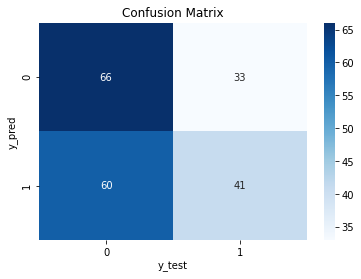

In [47]:
cm=confusion_matrix(data_test.Label,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt='')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [48]:
print(classification_report(data_test.Label,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.67      0.59        99
           1       0.55      0.41      0.47       101

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.53       200
weighted avg       0.54      0.54      0.53       200



**Klasifikasi Teks Ujicoba**

In [49]:
def text_preprocessing(text):
  df['preprocess_awal'] = text.apply(preprocessTweets)
  df['tokenkan'] = df['preprocess_awal'].apply(tokenkan)
  df['normalized'] = df['tokenkan'].apply(normalized_term)
  df['normalized'] = df['normalized'].apply(stopwords_removal)

  # create stemmer
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  # stemmed
  def stemmed_wrapper(term):
      return stemmer.stem(term)

  term_dict = {}

  for document in df['normalized']:
      for term in document:
          if term not in term_dict:
              term_dict[term] = ' '
              
  #print(len(term_dict))
  print("------------------------")

  for term in term_dict:
      term_dict[term] = stemmed_wrapper(term)
      print(term,":" ,term_dict[term])
      
  #print(term_dict)
  print("------------------------")


  # apply stemmed term to dataframe
  def get_stemmed_term(document):
      return [term_dict[term] for term in document]

  df['stemmed'] = df['normalized'].swifter.apply(get_stemmed_term)
  #print(df['stemmed'])

  def remove_punct(text):
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', '', text)
    return text_nopunct

  df['stemmed'] = df['stemmed'].astype(str)
  df['stemmed'] = df['stemmed'].apply(remove_punct)

In [50]:
X = 'Depresi kembali muncul, tolong pergi dari diriku. Sepertinya aku butuh tidur dan obat penenang lagi. Ada yang jual?dm please'
datax = {'Postingan':[X]}
df = pd.DataFrame(datax)
df.head()

,Postingan
0,"Depresi kembali muncul, tolong pergi dari diri..."


In [51]:
text_preprocessing(df['Postingan'])
df.head()

------------------------
depresi : depresi
muncul : muncul
tolong : tolong
pergi : pergi
diriku : diri
butuh : butuh
tidur : tidur
obat : obat
penenang : tenang
jual : jual
pesan : pesan
------------------------


Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

,Postingan,preprocess_awal,tokenkan,normalized,stemmed
0,"Depresi kembali muncul, tolong pergi dari diri...",depresi kembali muncul tolong pergi dari dirik...,"[depresi, kembali, muncul, tolong, pergi, dari...","[depresi, muncul, tolong, pergi, diriku, butuh...",depresi muncul tolong pergi diri butuh tidur o...


In [52]:
X_sample = tokenizer.texts_to_sequences(df['stemmed'])
print(X_sample)
X_sample = pad_sequences(X_sample, maxlen=MAX_SEQUENCE_LENGTH)

y_sample = new_model.predict(X_sample).flatten().tolist()
hasil = labels[np.argmax(y_sample)]
print(hasil)
if hasil == 0 :
  print('tidak mengidap gangguan psikologis')
else:
  print('mengidap gangguan psikologis')

[[1, 168, 38, 18, 23, 4, 46, 1720, 219, 101, 38]]
1
mengidap gangguan psikologis


In [53]:
#df = pd.read_excel('drive/MyDrive/data_psyco/Copy_of_test_data_20.xlsx').astype(str)

In [54]:
#text_preprocessing(df['Postingan_Original'])
#df.head()

In [55]:
#test_sequences_1 = tokenizer.texts_to_sequences(df["Postingan_Preprocessed"].tolist())
#test_cnn_data_1 = pad_sequences(test_sequences_1, maxlen=MAX_SEQUENCE_LENGTH)
#print(test_cnn_data_1)

In [56]:
def dicoba(text):
  return new_model.predict(test_cnn_data_1)

def dicoba_2(text):
  i = 0
  for y in text:
    hasil = labels[np.argmax(y)]
    #print(hasil)
    if hasil == 0:
      df.loc[i, 'Predicted'] = 'tidak mengidap gangguan psikologis'
      i = i+1
    else:
      df.loc[i, 'Predicted'] = 'mengidap gangguan psikologis'
      i = i+1

In [57]:
#hasil_1 = dicoba(test_cnn_data_1)
#print(hasil_1)
#dicoba_2(hasil_1)

In [58]:
#df.head(20)